Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

National average of $1,730 per year or $144 per month for full coverage

(1) State Farm:
Coverage Type	      Cost Per Month	Cost Per Year
Full coverage	            $104	       $1,250
Minimum coverage	        $52	           $625


Updated: Aug 10, 2023:
Car Insurance Provider	Average Monthly Cost	Average Annual Cost
USAA	                      $88	                  $1,054
Erie Insurance	              $103	                  $1,238
Nationwide	                  $107	                  $1,281
Geico	                      $109	                  $1,308
Auto-Owners Insurance	      $111	                  $1,337
State Farm	                  $123	                  $1,481
American Family Insurance	  $128	                  $1,537
Progressive	                  $134	                  $1,611
Travelers	                  $139	                  $1,669
Allstate	                  $174	                  $2,088
Farmers	                      $178	                  $2,140

Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

- In 2023 there are a projected 243.4 million licensed drivers in the US, which includes 89% of US adults.

Updated: Aug 17 2023
The vast majority of drivers have comprehensive and collision coverage. In addition to buying liability car insurance, 79% of insured drivers buy comprehensive coverage and 75% purchase collision coverage. One in eight drivers has no car insurance (12.6%).

Collision claims are claims to an insurance company or payment of cost in repairing one's vehicle regardless of who is at fault for the damage. According to the car insurance claims database from 2018, 6.1% of all collision insurance policyholders in the US had a claim.

Inladen van modules en df:

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('US_Accidents_June20.csv')

Algemene explorative data

In [3]:
print(df.columns)
df.info()
df.head()

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

df schoonmaken 

In [2]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["End_Time"])

specifieke slechte data aantekeningen

In [4]:
#d = df[df['State'] == 'CA']['City'].unique()
#print(d[600:1100]) #non ca cities in this list
#df['Wind_Direction'].unique()
# Saint Johns (Note: This appears twice, it should likely be St. Johns) FL state
#(Note: This appears twice, it should likely be St. Lucie) FL state

#TX state does not contain all counties

In [ ]:
# Get columns with missing values and the number of missing values in each column
columns_with_missing_values = df.columns[df.isnull().any()]
missing_values_per_column = df[columns_with_missing_values].isnull().sum()

# Iterate through columns with missing values and print the information
for column in columns_with_missing_values:
    missing_count = missing_values_per_column[column]
    print(f'"{column}" heeft {missing_count} missende waardes')

Data op landelijke schaal (Bart)

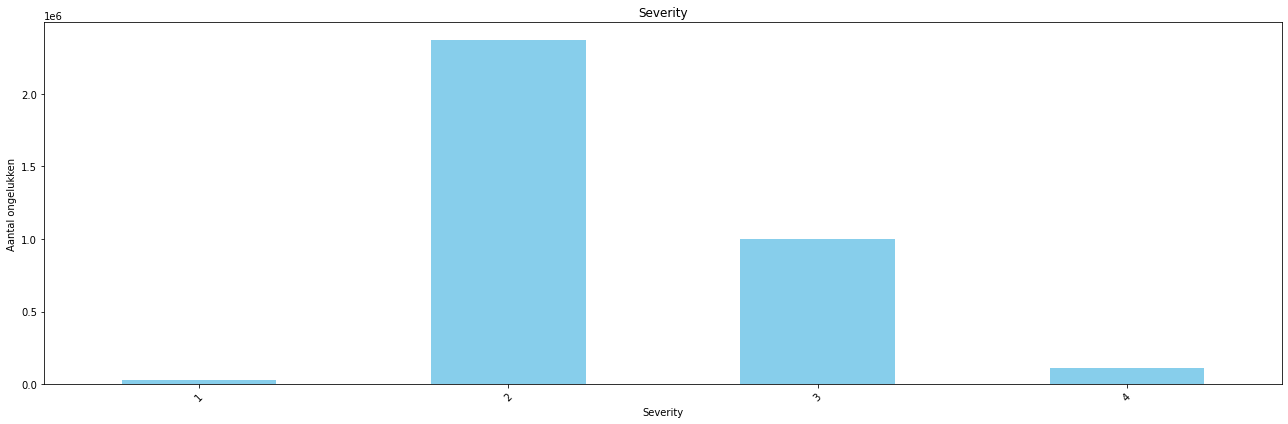

In [43]:
state_accident_counts = df['Severity'].value_counts()
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

In [ ]:
# Boxplot van 'Severity' vs. 'Temperature(F)'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Severity', y='Temperature(F)', data=df)
plt.title('Boxplot van Severity vs. Temperature(F)')
plt.xlabel('Severity')
plt.ylabel('Temperature(F)')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sunrise_Sunset', y='Severity', data=df)
plt.title('Paired Boxplots van Sunrise_Sunset en Severity')
plt.xlabel('Sunrise_Sunset')
plt.ylabel('Severity')
plt.show()

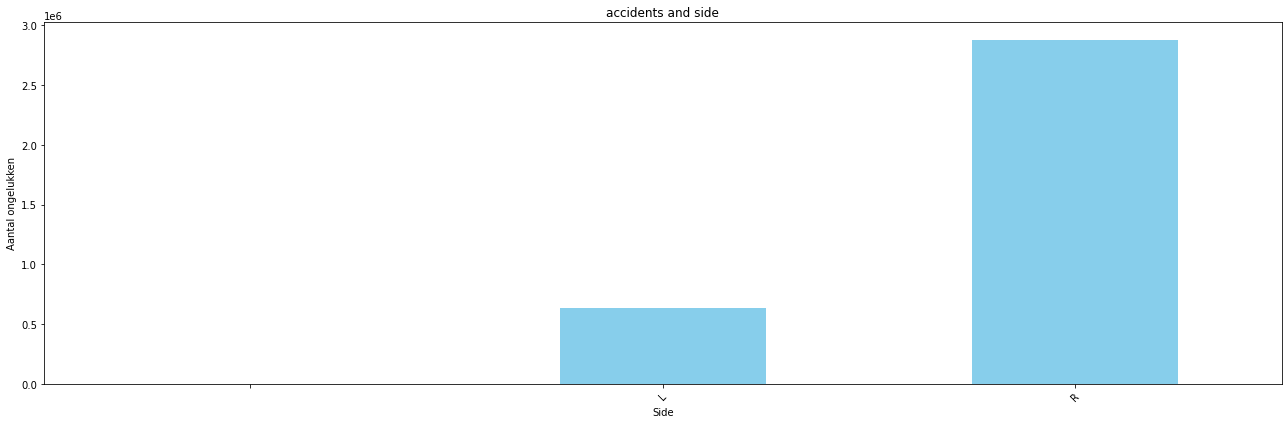

In [61]:
state_accident_counts = df['Side'].value_counts().head(60)
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('accidents and side')
plt.xlabel('Side')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Quint 


In [21]:
df_places = df[['Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']]

In [22]:
df_places['Place_accident'] = df_places.apply(lambda row: ','.join([col for col in df_places.columns if row[col]]), axis=1)


/var/folders/6b/rhfs1dgj5jv3bq1s3qxjzx280000gn/T/ipykernel_66042/4072891996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_places['Place_accident'] = df_places.apply(lambda row: ','.join([col for col in df_places.columns if row[col]]), axis=1)


In [23]:
df_places.head(10)

,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Place_accident
0,False,False,False,False,False,False,False,False,False,False,False,False,
1,False,False,False,False,False,False,False,False,False,False,False,False,
2,False,False,False,False,False,False,False,False,False,False,True,False,Traffic_Signal
3,False,False,False,False,False,False,False,False,False,False,False,False,
4,False,False,False,False,False,False,False,False,False,False,True,False,Traffic_Signal
5,False,False,False,False,False,False,False,False,False,False,False,False,
6,False,False,False,False,False,False,False,False,False,False,False,False,
7,False,False,False,False,False,False,False,False,False,False,False,False,
8,False,False,False,False,False,False,False,False,False,False,False,False,
9,False,False,False,False,False,False,False,False,False,False,False,False,


In [78]:
# Drivers per state, kaggle Data set

df_drivers_by_state = pd.read_csv('Licensed_drivers_By_State.csv')
print(df_drivers_by_state)


       Year  Gender    Cohort       State  Drivers
0      2017    Male  Under 16     Alabama      0.0
1      2017    Male  Under 16      Alaska      0.0
2      2017    Male  Under 16     Arizona      0.0
3      2017    Male  Under 16    Arkansas      0.0
4      2017    Male  Under 16  California      0.0
...     ...     ...       ...         ...      ...
57829  2018  Female     65-69     Wyoming  16061.0
57830  2018  Female     70-74     Wyoming  11804.0
57831  2018  Female     75-79     Wyoming   7770.0
57832  2018  Female     80-84     Wyoming   4715.0
57833  2018  Female       85+     Wyoming   3456.0

[57834 rows x 5 columns]


In [89]:
# Calculate sum per state


sum_per_state = df_drivers_by_state.groupby('State')['Drivers'].sum()
sum_per_state_sorted = sum_per_state.sort_values(ascending=False)

# Create dataframe
df_licensed_drivers = pd.DataFrame({'Licensed_Drivers': sum_per_state_sorted})


In [92]:
df_licensed_drivers = df_licensed_drivers.reset_index()

state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

df_licensed_drivers['State'] = df_licensed_drivers['State'].replace(state_abbreviations)

print(df_licensed_drivers)



                   State  Licensed_Drivers
0                     CA       576317897.0
1                     TX       362911317.0
2                     FL       332206242.0
3                     NY       278903109.0
4                     PA       214285552.0
5                     IL       202089002.0
6                     OH       197074002.0
7                     MI       174597232.0
8                     NC       155971968.0
9                     GA       150907550.0
10                    NJ       146079208.0
11                    VA       131059091.0
12                    WA       118755159.0
13                    MA       116153834.0
14                    IN       112910836.0
15                    TN       110096934.0
16                    MO       101008854.0
17                    AZ       100843536.0
18                    WI        98554261.0
19                    MD        91949382.0
20                    AL        91094599.0
21                    CO        85660123.0
22         

In [94]:
state_accident_counts = df['State'].value_counts()
df_state_accident_counts = pd.DataFrame({'Accident_counts': state_accident_counts})
df_state_accident_counts = df_state_accident_counts.reset_index()

print(df_state_accident_counts)

   State  Accident_counts
0     CA           816825
1     TX           329284
2     FL           258002
3     SC           173277
4     NC           165958
5     NY           160817
6     PA           106787
7     IL            99692
8     VA            96075
9     MI            95983
10    GA            93614
11    OR            90122
12    MN            81863
13    AZ            78584
14    TN            69895
15    WA            68544
16    OH            66139
17    LA            61515
18    OK            60003
19    NJ            59059
20    MD            53593
21    UT            51685
22    CO            49731
23    AL            44625
24    MA            39044
25    IN            33746
26    MO            33643
27    CT            25901
28    NE            23970
29    KY            22553
30    WI            20120
31    RI            11753
32    IA            11475
33    NV            10643
34    NH             7984
35    KS             7939
36    MS             6585
37    DE    

In [97]:
merged_df = df_licensed_drivers.merge(df_state_accident_counts, on='State', how='left')
print(merged_df)

                   State  Licensed_Drivers  Accident_counts
0                     CA       576317897.0         816825.0
1                     TX       362911317.0         329284.0
2                     FL       332206242.0         258002.0
3                     NY       278903109.0         160817.0
4                     PA       214285552.0         106787.0
5                     IL       202089002.0          99692.0
6                     OH       197074002.0          66139.0
7                     MI       174597232.0          95983.0
8                     NC       155971968.0         165958.0
9                     GA       150907550.0          93614.0
10                    NJ       146079208.0          59059.0
11                    VA       131059091.0          96075.0
12                    WA       118755159.0          68544.0
13                    MA       116153834.0          39044.0
14                    IN       112910836.0          33746.0
15                    TN       110096934

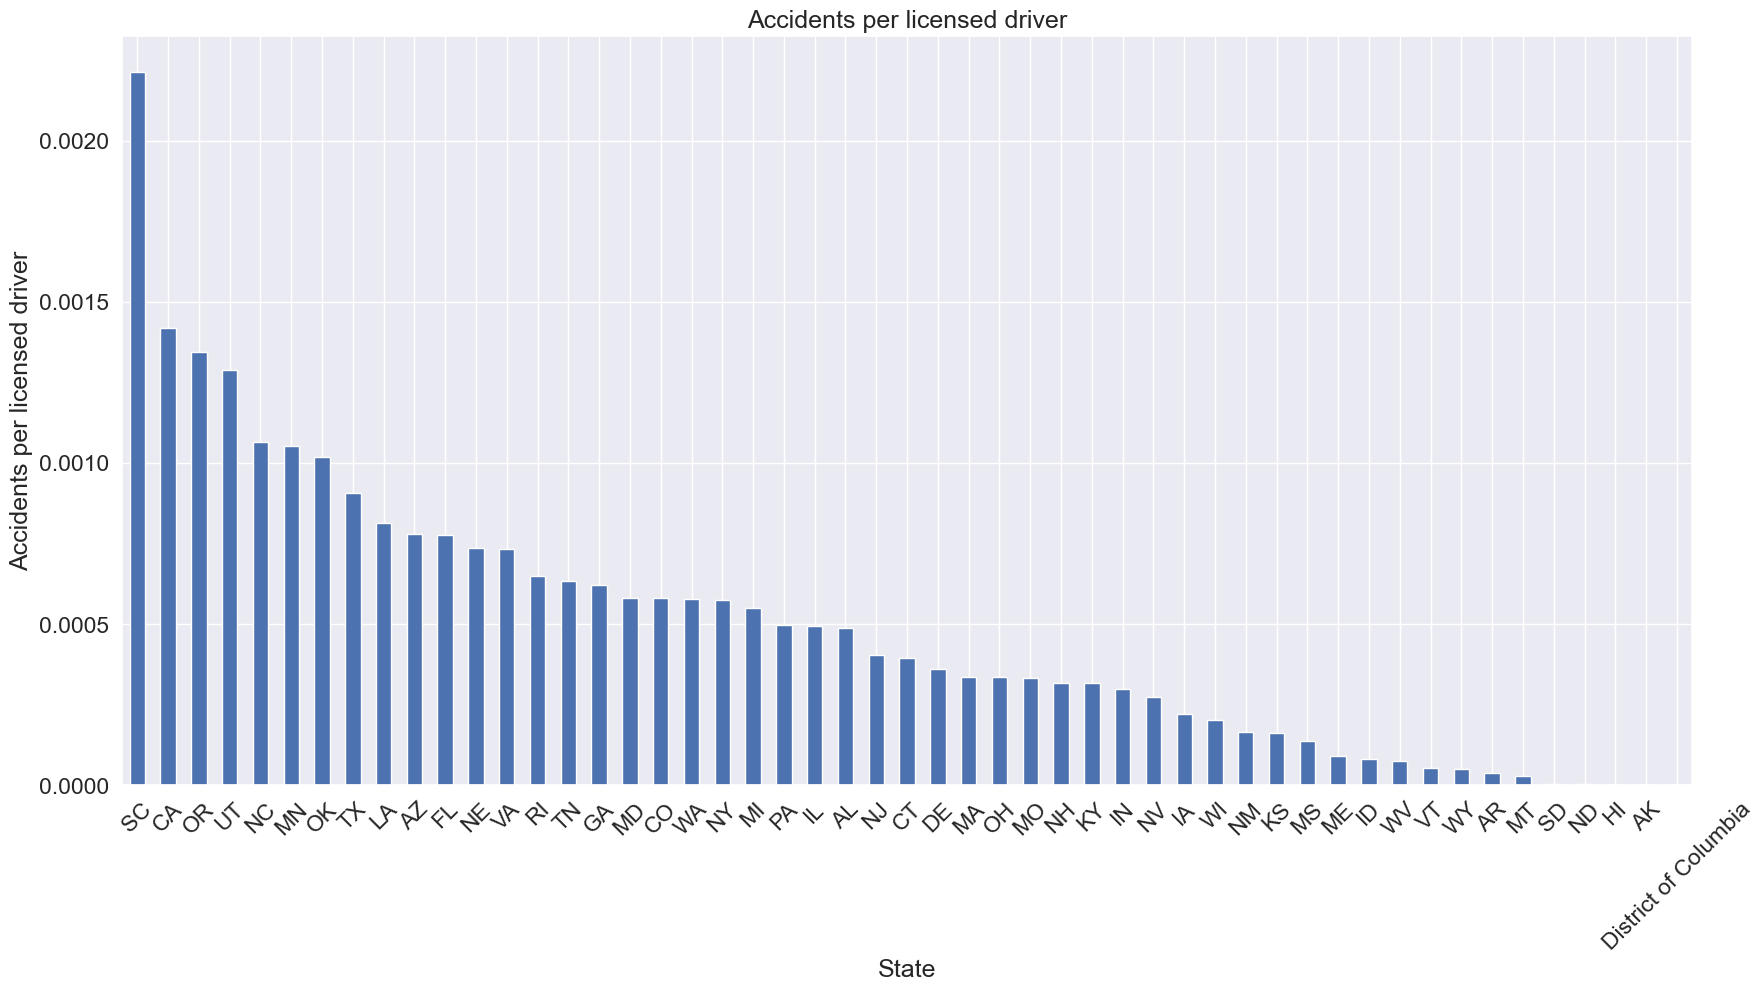

In [115]:
sns.set(font_scale=1.5)  # 1 is default. Values >1 increase the font size.


merged_df['Accidents_per_driver'] = merged_df.iloc[:, 2] / merged_df.iloc[:, 1]

df_sorted = merged_df.sort_values(by='Accidents_per_driver', ascending=False)

ax = df_sorted.plot.bar(x='State', y='Accidents_per_driver', legend=False, figsize=(18,10))
ax.set_ylabel('Accidents per licensed driver')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout for better appearance
plt.title('Accidents per licensed driver')
plt.show()




Import file claim frequency and severity per year US

In [132]:
claimsUS_year = pd.read_csv('Private_Passenger_Auto_Insurance_Losses.csv', delimiter=';')
print(claimsUS_year)

# Claim frequency is the amount of claims per 100 earned car years. A car year is equal to 365 days of insured coverage for one vehicle.
# Claim severity is the size of the loss in $ (and includes loss adjustment expenses)
# https://www.iii.org/fact-statistic/facts-statistics-auto-insurance#Auto%20claims


   Year  Bodily injury Claim frequency Bodily injury Claim severity  \
0  2012                           0.95                       14,690   
1  2013                           0.95                       15,441   
2  2014                           0.97                       15,384   
3  2015                           0.89                       17,014   
4  2016                           1.04                       16,082   
5  2017                           1.08                       16,143   
6  2018                           1.09                       17,102   
7  2019                           1.07                       18,204   
8  2020                           0.90                       19,691   
9  2021                           0.78                       22,734   

   Property damage Claim frequency Property damage Claim severity  \
0                             3.50                          3,073   
1                             3.55                          3,231   
2          

Data op individuele staten (Quint & Doena)

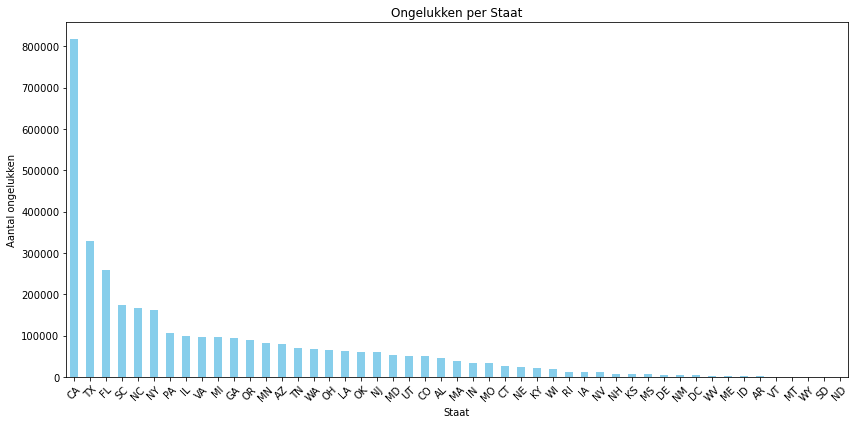

In [5]:
state_accident_counts = df['State'].value_counts()

plt.figure(figsize=(12, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Staat')
plt.xlabel('Staat')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


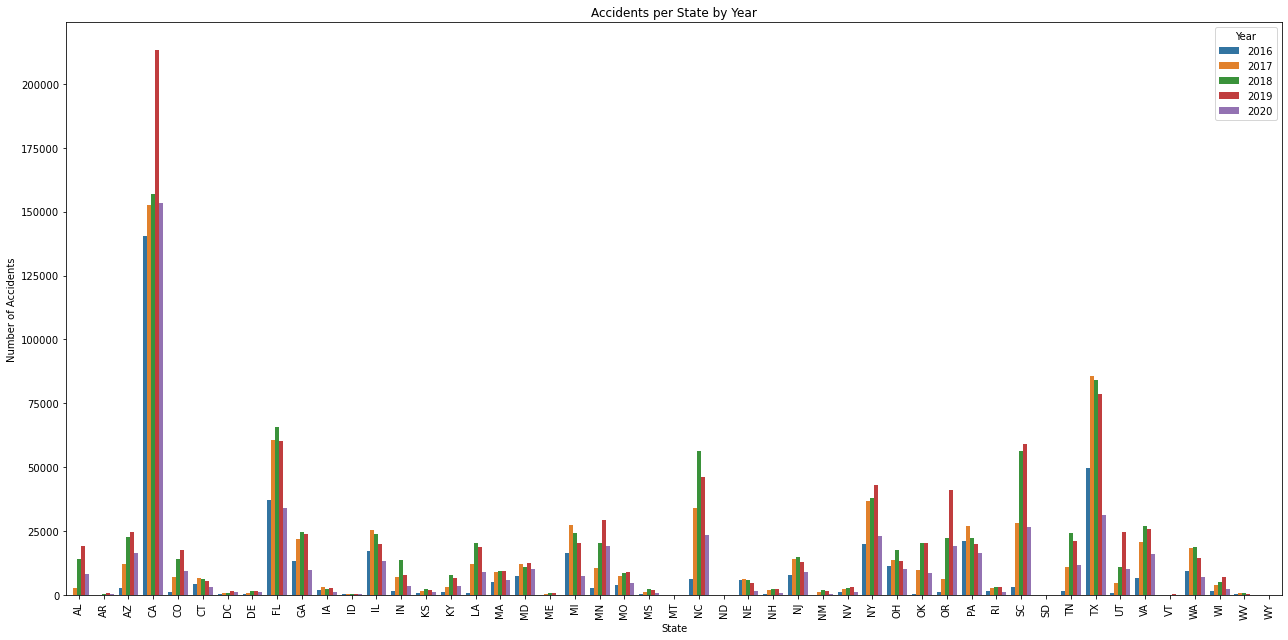

In [6]:
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year

# Group by 'State', 'Year', and calculate the accident counts
state_year_accident_counts = df.groupby(['State', 'Year']).size().reset_index(name='accident_count')

plt.figure(figsize=(18, 9))

# Create a bar chart using seaborn with 'State' on the x-axis and 'Year' as hue
sns.barplot(data=state_year_accident_counts, x='State', y='accident_count', hue='Year')

plt.title('Accidents per State by Year')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()

Isabel:

In [ ]:
#leuk coderen

Sophia met weer enzo:

In [ ]:
#leuker coderen